In [1]:
import sklearn.datasets as skds
import matplotlib.pyplot as plt

In [2]:
X, Y = skds.make_blobs(n_samples=100, n_features=2, centers=2, random_state=1)
print(X[:5, :], type(X))
print(Y[:5], type(Y))

[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]] <class 'numpy.ndarray'>
[0 1 0 0 1] <class 'numpy.ndarray'>


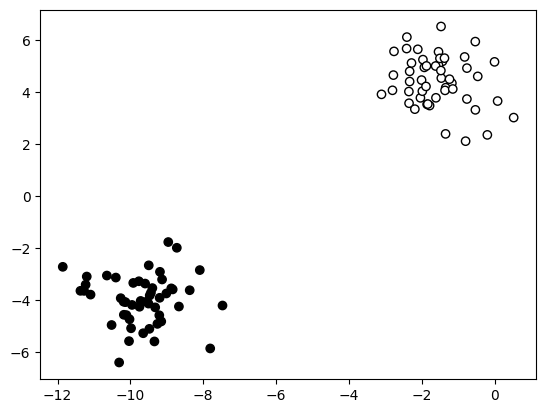

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Greys", edgecolors="black")

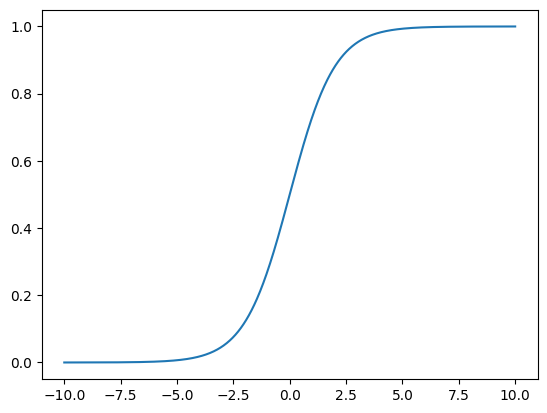

In [4]:
import numpy as np

z = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-z))
plt.plot(z, y)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


def generate_data():
    np.random.seed(0)
    class_1 = np.random.randn(50, 2) - [5, 5]
    class_2 = np.random.randn(50, 2) + [5, 5]
    X = np.vstack((class_1, class_2))
    y = np.hstack((np.zeros(50), np.ones(50)))
    return X, y


def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()


def relu(x):
    return np.maximum(0, x)


In [6]:
X, y = generate_data()
X, y

(array([[-3.23594765, -4.59984279],
        [-4.02126202, -2.7591068 ],
        [-3.13244201, -5.97727788],
        [-4.04991158, -5.15135721],
        [-5.10321885, -4.5894015 ],
        [-4.85595643, -3.54572649],
        [-4.23896227, -4.87832498],
        [-4.55613677, -4.66632567],
        [-3.50592093, -5.20515826],
        [-4.6869323 , -5.85409574],
        [-7.55298982, -4.3463814 ],
        [-4.1355638 , -5.74216502],
        [-2.73024538, -6.45436567],
        [-4.95424148, -5.18718385],
        [-3.46722079, -3.53064123],
        [-4.84505257, -4.62183748],
        [-5.88778575, -6.98079647],
        [-5.34791215, -4.84365103],
        [-3.76970932, -3.79762015],
        [-5.38732682, -5.30230275],
        [-6.04855297, -6.42001794],
        [-6.70627019, -3.0492246 ],
        [-5.50965218, -5.4380743 ],
        [-6.25279536, -4.22250964],
        [-6.61389785, -5.21274028],
        [-5.89546656, -4.6130975 ],
        [-5.51080514, -6.18063218],
        [-5.02818223, -4.571

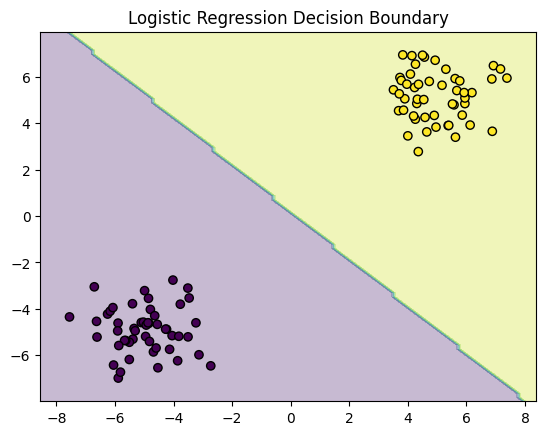

In [7]:
# Solve question 1
model = LogisticRegression().fit(X, y)
plot_decision_boundary(model, X, y, "Logistic Regression Decision Boundary")

Equation of decision boundary: 0.16308663086330438x + 0.12189235231259873y + -0.048913526043538325 = 0
Alternative equation: 0.32617326172660877x + 0.24378470462519747y + -0.09782705208707665 = 0


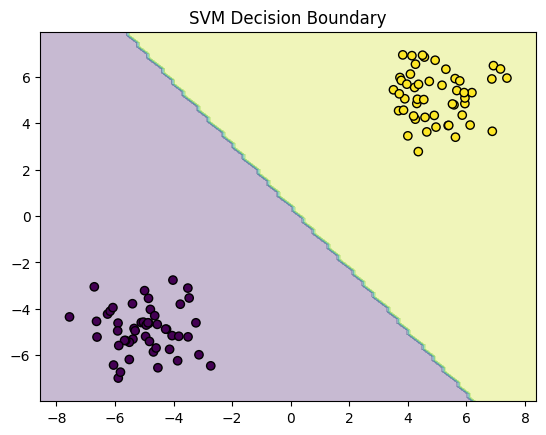

In [8]:
# Solve question 2
model = SVC(kernel='linear').fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]
print(f"Equation of decision boundary: {w[0]}x + {w[1]}y + {b} = 0")
alternative_eq = f"{2 * w[0]}x + {2 * w[1]}y + {2 * b} = 0"
print(f"Alternative equation: {alternative_eq}")
plot_decision_boundary(model, X, y, "SVM Decision Boundary")

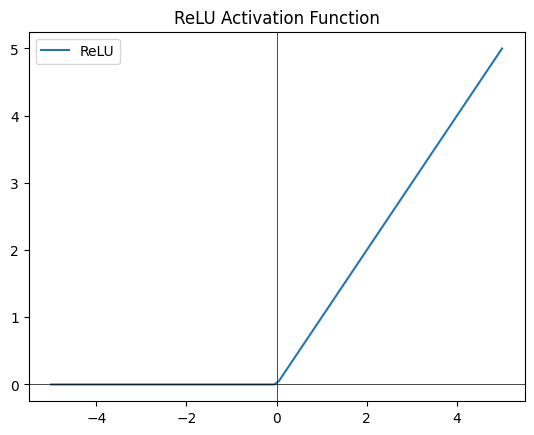

In [9]:
# Plot ReLU
x = np.linspace(-5, 5, 100)
y = relu(x)
plt.plot(x, y, label='ReLU')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("ReLU Activation Function")
plt.legend()
plt.show()

/Users/shlomibenshushan/Repositories/deep-learning-openu/.conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


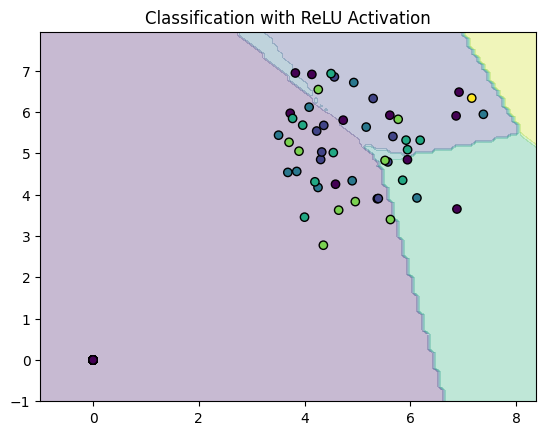

In [10]:
transformed_X = relu(X)
y = y.astype(int)  # Ensure y contains integer class labels
model = LogisticRegression().fit(transformed_X, y)
plot_decision_boundary(model, transformed_X, y, "Classification with ReLU Activation")

In [11]:
model = SVC(kernel='linear').fit(X, y)
w = model.coef_[0]
b = model.intercept_[0]
print(f"Original model equation: {w[0]}x + {w[1]}y + {b} = 0")

Original model equation: -1.3399710041994695e-05x + -3.634330239776773e-05y + 0.9999245789359476 = 0


In [12]:
perturbed_w = w + np.random.normal(0, 0.1, size=w.shape)
perturbed_b = b + np.random.normal(0, 0.1)
print(f"Perturbed model equation: {perturbed_w[0]}x + {perturbed_w[1]}y + {perturbed_b} = 0")

Perturbed model equation: -0.09977015359384626x + -0.08004016474187375y + 1.0206321363414084 = 0
